In [1]:
import numpy as np
import ast
import matplotlib
import matplotlib.pyplot as plt

## 1. Output Plots

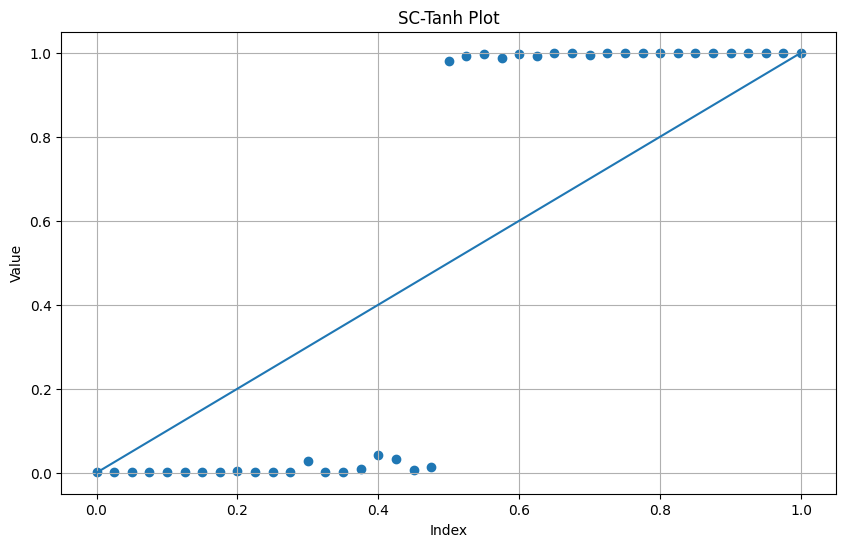

In [2]:
# test_tanh

file_path = "../out/out_tanh.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array2 = ast.literal_eval(array_strings[1])
plt.figure(figsize=(10, 6))
plt.scatter(array1, array2)
plt.plot(array1, array1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SC-Tanh Plot')
plt.grid()
plt.show()


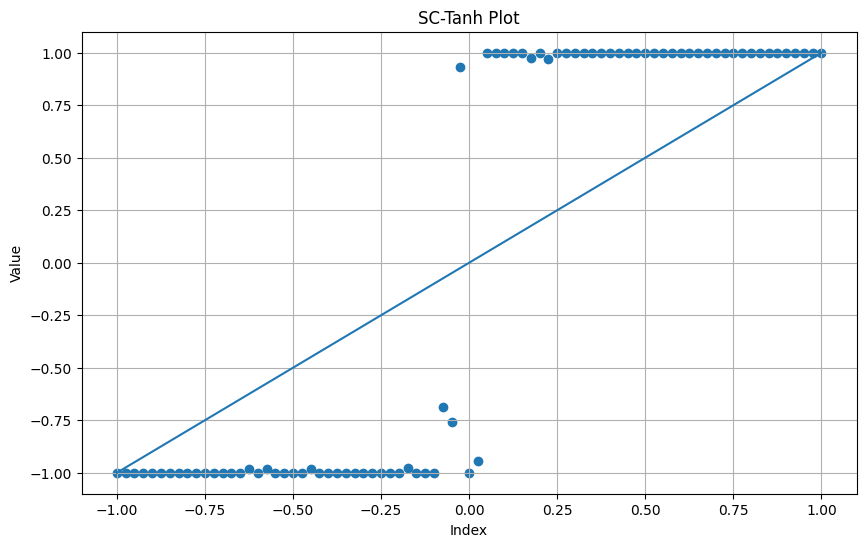

In [60]:
# test_apc_neuron

file_path = "../out/out_apc_neuron.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = np.array(ast.literal_eval(array_strings[0]))
array2 = np.array(ast.literal_eval(array_strings[1]))
plt.figure(figsize=(10, 6))
plt.scatter(2*array1-1, 2*array2-1)
plt.plot(2*array1-1, 2*array1-1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SC-Tanh Plot')
plt.grid()
plt.show()


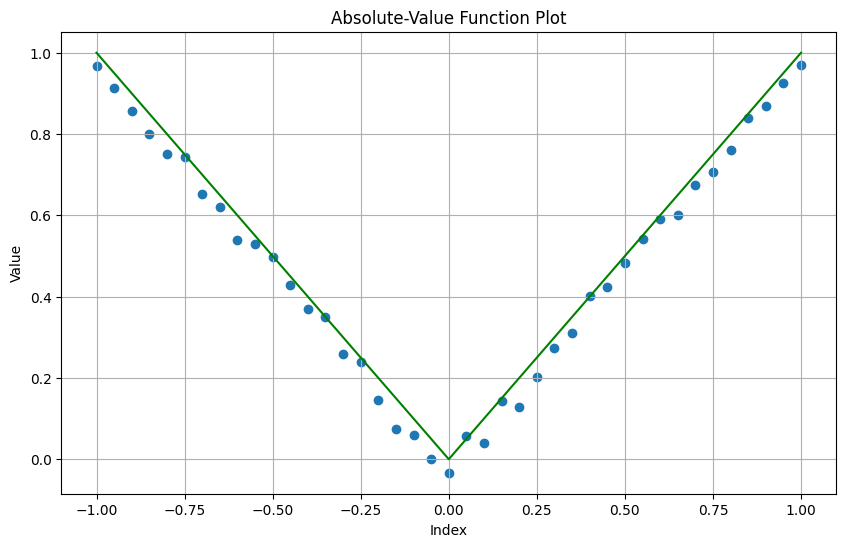

In [4]:
# test_abs

file_path = "../out/out_abs.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array1 = np.array(array1)
array2 = ast.literal_eval(array_strings[1])
array2 = np.array(array2)
plt.figure(figsize=(10, 6))
plt.scatter(2*array1 - 1, 2*array2 - 1)
plt.plot(2*array1 - 1, np.abs(2*array1 - 1), "g")
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Absolute-Value Function Plot')
plt.grid()
plt.show()

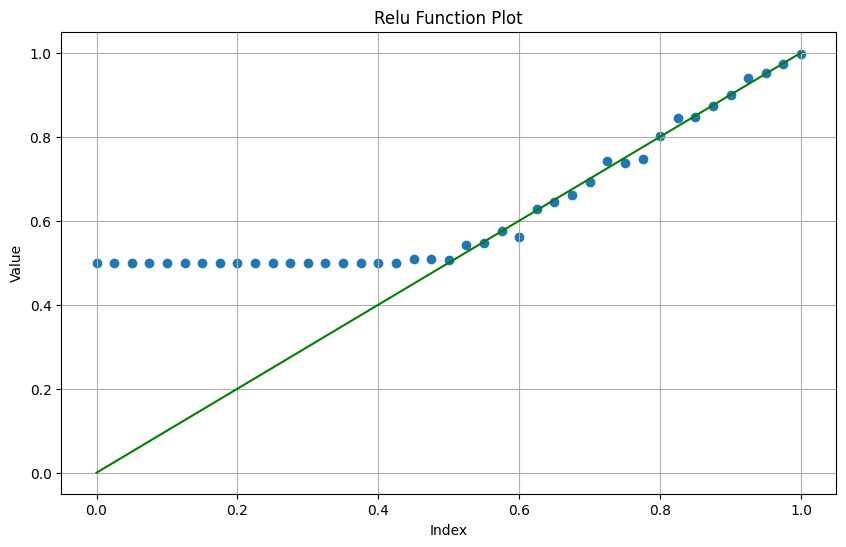

In [92]:
# test_relu

file_path = "../out/out_lsm.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array1 = np.array(array1)
array2 = ast.literal_eval(array_strings[1])
array2 = np.array(array2)
plt.figure(figsize=(10, 6))

# plt.scatter(2*array1 - 1, 2*array2 - 1)
# plt.plot(2*array1 - 1, (2*array1 - 1), "g")

plt.scatter(array1 , array2 )
plt.plot(array1 , array1 , "g")

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Relu Function Plot')
plt.grid()
plt.show()

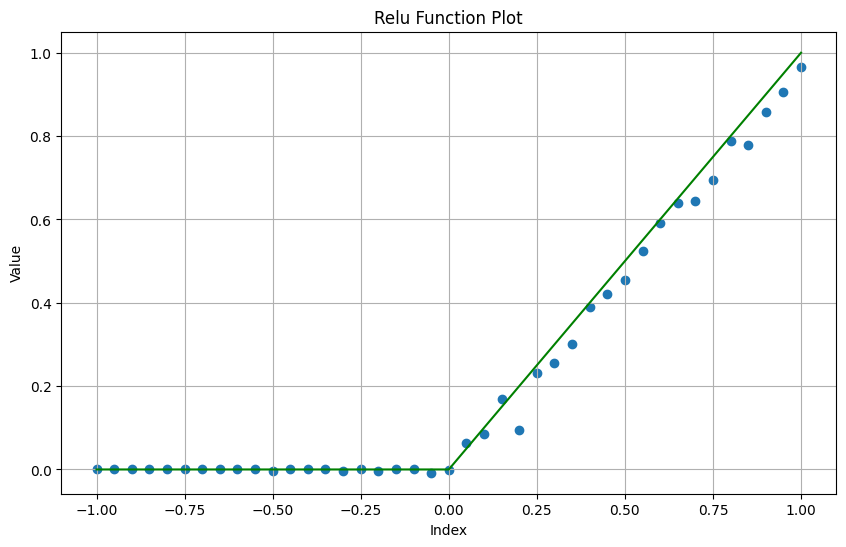

In [55]:
# test_relu_2

file_path = "../out/out_relu_2.txt"  
with open(file_path, 'r') as file:
    content = file.read()
    array_strings = content.split('\n')  # Assuming the arrays are separated by two newlines

array1 = ast.literal_eval(array_strings[0])
array1 = np.array(array1)
array2 = ast.literal_eval(array_strings[1])
array2 = np.array(array2)
plt.figure(figsize=(10, 6))

# plt.scatter(2*array1 - 1, 2*array2 - 1)
# plt.plot(2*array1 - 1, (2*array1 - 1), "g")

plt.scatter( 2*array1 - 1 , 2*array2 - 1 )
plt.plot( 2*array1 - 1 , list(map(lambda x: max(0, x), 2*array1 - 1)) , "g")

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Relu Function Plot')
plt.grid()
plt.show()

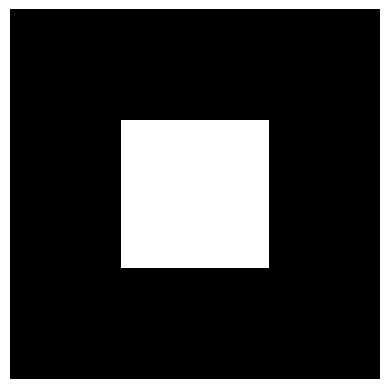

In [5]:
def create_bw_test_image(image_size=(100, 100), square_size=40):
    # Create a simple black and white image
    image = np.zeros(image_size, dtype=np.uint8)  # Black background

    # Draw a white square in the center
    start_x = (image_size[0] - square_size) // 2
    start_y = (image_size[1] - square_size) // 2
    image[start_x:start_x+square_size, start_y:start_y+square_size] = 255  # White square

    return image

image = create_bw_test_image()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



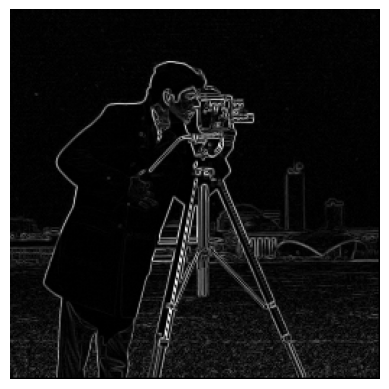

In [17]:
file_path = "../out/out_edge_detect_deter.txt"  
with open(file_path, 'r') as file:
    content = file.read()

array_image = ast.literal_eval(content)
array_image = (np.array(array_image, dtype=np.uint8))

from PIL import Image
im = Image.fromarray(array_image)
im.save("cameraman_readedge.png")

plt.imshow(array_image, cmap='gray')
plt.axis('off')
plt.show()

## 2. Dataset and NN

### 2.1 Synthetic 1

/tmp/ipykernel_883/1083918536.py:33: RuntimeWarning: divide by zero encountered in log
  error = -(y[i] * np.log(prediction) + (1 - y[i]) * np.log(1 - prediction))
/tmp/ipykernel_883/1083918536.py:33: RuntimeWarning: invalid value encountered in scalar multiply
  error = -(y[i] * np.log(prediction) + (1 - y[i]) * np.log(1 - prediction))
/tmp/ipykernel_883/1083918536.py:33: RuntimeWarning: invalid value encountered in log
  error = -(y[i] * np.log(prediction) + (1 - y[i]) * np.log(1 - prediction))


Trained Weights: [ 0.05696423 -0.46027882]


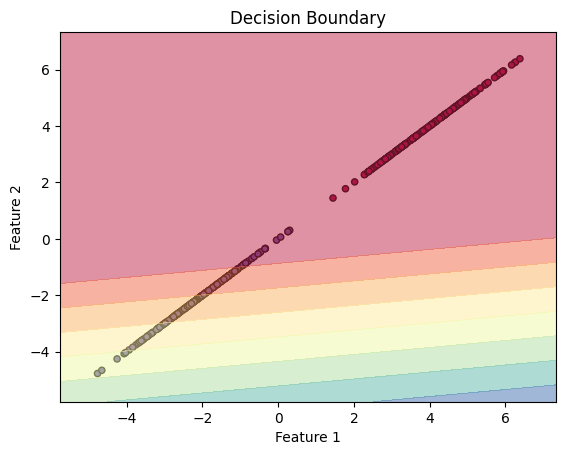

In [18]:
# Define the tanh activation function
def func(x):
    return np.maximum(0,x)
    # return np.tanh(x)

# Forward operation for a single hidden layer neural network with tanh activation
def forward(weights, inputs):
    activations = func(np.dot(inputs, weights))
    return activations

# Synthetic dataset generation (same as before)
np.random.seed(0)
num_samples = 200
cluster1 = np.random.randn(num_samples, 1) + np.array([4, 4])
cluster2 = np.random.randn(num_samples, 1) + np.array([-2, -2])
X = np.vstack([cluster1, cluster2])
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# Neural network training
learning_rate = 0.01
num_epochs = 1000

# Initialize weights randomly (you may need to adjust the shape)
# For simplicity, we assume a single-layer network with two weights.
weights = np.random.randn(2)

for epoch in range(num_epochs):
    for i in range(len(X)):
        # Forward pass to get predictions
        prediction = forward(weights, X[i])

        # Calculate the error (assuming binary cross-entropy loss)
        error = -(y[i] * np.log(prediction) + (1 - y[i]) * np.log(1 - prediction))

        # Compute the gradient (assuming a simple gradient)
        gradient = (prediction - y[i]) * X[i]

        # Update weights using gradient descent
        weights -= learning_rate * gradient

    # Calculate and print the average loss for this epoch
    average_loss = np.mean(error)
    # print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {average_loss:.4f}")

# Print the final trained weights
print("Trained Weights:", weights)
# Plot the synthetic dataset points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, marker='o', edgecolor='k', s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the decision boundary (reduce the step size)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = forward(weights, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.title("Decision Boundary")
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def tanh(x):
    return np.tanh(x)

# Derivative of the tanh activation function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Forward operation for a single hidden layer neural network with tanh activation
def forward(weights_input_hidden, weights_hidden_output, inputs):
    # Calculate the hidden layer activations (tanh activation)
    print(np.dot(inputs, weights_input_hidden))
    hidden_activations = tanh(np.dot(inputs, weights_input_hidden))
    print(np.dot(hidden_activations, weights_hidden_output))
    # Calculate the output layer activations (tanh activation)
    output_activations = tanh(np.dot(hidden_activations, weights_hidden_output))
    
    return output_activations

# Generate synthetic dataset
np.random.seed(0)
num_samples = 200
cluster1 = np.random.randn(num_samples, 2) + np.array([2, 2])
cluster2 = np.random.randn(num_samples, 2) + np.array([-2, -2])
X = np.vstack([cluster1, cluster2])
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# Define neural network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights randomly
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)

# Training parameters
learning_rate = 0.0001
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    for i in range(len(X)):
        # Forward pass
        output = forward(weights_input_hidden, weights_hidden_output, X[i])
        
        # Compute loss (mean squared error)
        loss = np.mean((output - y[i])**2)
        
        # Backpropagation
        # Compute gradients
        output_error = 2 * (output - y[i]) 
        hidden_error = np.dot(output_error, weights_hidden_output.T) * tanh_derivative(np.dot(X[i], weights_input_hidden))
        
        # Update weights using gradient descent
        weights_hidden_output -= learning_rate * np.dot(np.transpose(np.atleast_2d(output_error)), np.atleast_2d(tanh(np.dot(np.transpose(np.atleast_2d(np.dot(X[i], weights_input_hidden))), hidden_error))))
        
        weights_input_hidden -= learning_rate * np.dot(np.transpose(np.atleast_2d(X[i])), np.atleast_2d(hidden_error))
        
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot the final decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = forward(weights_input_hidden, weights_hidden_output, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset with Decision Boundary")
plt.show()

[ 7.57007571  3.93036023  0.97908579 -1.53542695]
[-2.78926783]


ValueError: shapes (2,400) and (1,4) not aligned: 400 (dim 1) != 1 (dim 0)

### 2.2 Synthetic 2

### 2.x MNIST

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

# Define a simple neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the MNIST dataset
model.fit(train_images, train_labels, epochs=5)



2023-10-08 07:24:32.840277: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-08 07:24:32.879271: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-08 07:24:32.880309: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 07:24:33.572222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-08 07:24:35.151578: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-08 07:24:35.151870: W tensorflow/core/common_r

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1152 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9862


In [13]:
# Get the weights of each layer into 1D arrays
layer_weights = []
biases = []
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        weights = layer.get_weights()
        if weights:
            layer_weights.append(weights[0]) # the np.array of weights is wrapped around a list. So weights[0].
            biases.append(weights[1])

# Print the weights of each layer
for i, weights in enumerate(layer_weights):
    print(f'Layer {i + 1} weights shape: {weights.shape} biases shape: {biases[i].shape}')
print(biases[1])

Layer 1 weights shape: (784, 128) biases shape: (128,)
Layer 2 weights shape: (128, 10) biases shape: (10,)
[-0.13812073 -0.08385939  0.03274156 -0.1204146   0.10309211 -0.02494201
  0.05757122 -0.01648227  0.16003363 -0.03177963]


In [45]:
for i, weights in enumerate(layer_weights):
    # print(f'Layer {i + 1} weights shape: {weights[0:1000]}')

    if np.all((weights >= -1)) & np.all((weights <= 1)):
        print(f'Layer {i + 1} weights are within range (-1, 1)')
    else:
        print(f'Layer {i + 1} weights are NOT within range (-1, 1)')

# print(sorted(layer_weights[1]))

Layer 1 weights are within range (-1, 1)
Layer 2 weights are NOT within range (-1, 1)


In [68]:
import random
func = np.vectorize(lambda x: int(random.random() < x))
func(layer_weights[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [70]:
import numpy as np

# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Convert the NumPy array to a string


# Print the resulting string
print(int(''.join(map(str, arr))))

12345


In [2]:
model.save_weights('mnist_model_weights.h5')

In [11]:
layer_weights = model.layers[1].get_weights()

# The first element of the list contains the weights, and the second element contains the biases
biases = layer_weights[1]
biases

array([-0.12214652,  0.04232122,  0.09148923,  0.05659844,  0.0253026 ,
        0.09247073,  0.06692737, -0.06410258,  0.01656782, -0.05049092,
       -0.10075411,  0.06810119, -0.01609366, -0.04051385,  0.00347939,
        0.08195382,  0.07812501,  0.00606795,  0.08750692,  0.09202068,
        0.03423807,  0.07530506, -0.09525338,  0.05308591,  0.02312869,
       -0.04850786, -0.04639259,  0.027447  ,  0.00320238,  0.18418325,
       -0.05148744,  0.08889712, -0.15929694,  0.06764802, -0.07891342,
       -0.06848884,  0.03802768,  0.018327  ,  0.20086336, -0.08874703,
       -0.09205748, -0.03195061,  0.16370755,  0.10808916,  0.01527916,
       -0.05578849,  0.11294869,  0.05316928, -0.01858829,  0.04704337,
       -0.00638218,  0.17752047,  0.06210702,  0.01920992,  0.19384605,
       -0.00862206, -0.035675  , -0.01983422, -0.00590657,  0.13563883,
        0.1464473 , -0.06610724, -0.13781545,  0.16611074,  0.01509525,
        0.05406688, -0.02150044, -0.0393328 ,  0.03191204,  0.02

In [89]:
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [76]:
np.array((list(str(101011)))).astype(int)

array([1, 0, 1, 0, 1, 1])

### 2.3 Digits Dataset `sklearn`

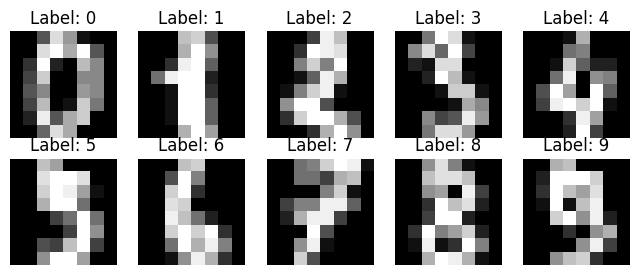

In [57]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = datasets.load_digits()

# The dataset is stored as a dictionary-like object
# Access the data, target, and other attributes
X = digits.data  # The feature matrix (images)
y = digits.target  # The target labels (digits)

# Visualize some example digits
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  # For input normalization
from sklearn import datasets

# Load the Digits dataset
digits = datasets.load_digits()

# Choose two classes (e.g., classes 0 and 1) for binary classification
class_0 = 0
class_1 = 1

# Filter the dataset to only include the chosen classes
mask = (digits.target == class_0) | (digits.target == class_1)
data = digits.data[mask]
labels = digits.target[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Normalize input data to the range [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define an MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)  # Apply sigmoid to output
        return out

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 32
output_size = 1  # Binary classification

# Initialize the model
model = MLPModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

print((X_train.ge(0) & X_train.le(1)).all())

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).view(-1)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
print(f'Accuracy: {accuracy:.2f}')

tensor(True)
Epoch [100/1000], Loss: 0.0834
Epoch [200/1000], Loss: 0.0220
Epoch [300/1000], Loss: 0.0106
Epoch [400/1000], Loss: 0.0063
Epoch [500/1000], Loss: 0.0042
Epoch [600/1000], Loss: 0.0030
Epoch [700/1000], Loss: 0.0023
Epoch [800/1000], Loss: 0.0018
Epoch [900/1000], Loss: 0.0014
Epoch [1000/1000], Loss: 0.0012
Accuracy: 1.00


In [40]:
print(f"Label: {y_test[0:20]} \t Expected Prob: {model(X_test[0:20])}")

Label: tensor([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 1.]) 	 Expected Prob: tensor([[9.9995e-01],
        [1.9307e-04],
        [3.3668e-04],
        [9.9538e-01],
        [7.8081e-04],
        [2.9810e-04],
        [2.7556e-04],
        [9.9991e-01],
        [3.2018e-04],
        [9.9588e-01],
        [4.9928e-05],
        [9.9954e-01],
        [9.9995e-01],
        [9.9811e-01],
        [1.8068e-03],
        [9.9974e-01],
        [9.9964e-01],
        [1.9598e-04],
        [9.9997e-01],
        [9.9616e-01]], grad_fn=<SigmoidBackward0>)


In [55]:
# Get the model's state dictionary
model_state_dict = model.state_dict()

# Save the state dictionary to a file (optional)
torch.save(model_state_dict, 'model_weights.pth')

# Print the state dictionary keys and their shapes
for key, value in model_state_dict.items():
    print(f'Layer: {key}, Shape: {value.shape}')

# Access specific layers' weights
fc1_weights = model_state_dict['fc1.weight']
fc1_biases = model_state_dict['fc1.bias']
fc2_weights = model_state_dict['fc2.weight']
fc2_biases = model_state_dict['fc2.bias']

# print("Weights and Biases of fc1 layer:")
# print("Weights:")
# print(model_state_dict['fc1.weight'])
# print("Biases:")
# print(model_state_dict['fc1.bias'])

# print("\nWeights and Biases of fc2 layer:")
# print("Weights:")
# print(model_state_dict['fc2.weight'])
# print("Biases:")
# print(model_state_dict['fc2.bias'])


print((model_state_dict['fc2.weight'].ge(-1) & model_state_dict['fc2.weight'].le(1)).all())

Layer: fc1.weight, Shape: torch.Size([32, 64])
Layer: fc1.bias, Shape: torch.Size([32])
Layer: fc2.weight, Shape: torch.Size([1, 32])
Layer: fc2.bias, Shape: torch.Size([1])
tensor(True)


In [46]:
import random
def list_to_binary(arr):
    return int(''.join(['1' if x > 0.5 else '0' for x in arr]), 2)

func = lambda x: int(random.random() < x)


print(bin(list_to_binary(model_state_dict['fc1.bias'].apply_(func))))

0b100001000000000000000010010


In [50]:
fc1_bias = model_state_dict['fc1.bias'].clone()
print(fc1_bias)
fc1_bias.apply_(func)
print(fc1_bias)
print(model_state_dict['fc1.bias'] )

tensor([-0.1129,  0.2281, -0.1120,  0.0406,  0.0351, -0.4151,  0.1757, -0.0534,
         0.0021, -0.0037,  0.3080, -0.1163,  0.0387,  0.1400,  0.0466, -0.0558,
         0.0165, -0.0483,  0.1422, -0.0067,  0.0043,  0.1182,  0.2482,  0.1185,
        -0.2176,  0.1740,  0.0286, -0.1286,  0.2980, -0.0852,  0.0547,  0.0047])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([-0.1129,  0.2281, -0.1120,  0.0406,  0.0351, -0.4151,  0.1757, -0.0534,
         0.0021, -0.0037,  0.3080, -0.1163,  0.0387,  0.1400,  0.0466, -0.0558,
         0.0165, -0.0483,  0.1422, -0.0067,  0.0043,  0.1182,  0.2482,  0.1185,
        -0.2176,  0.1740,  0.0286, -0.1286,  0.2980, -0.0852,  0.0547,  0.0047])


In [30]:
[list_to_binary(x) for x in model_state_dict['fc2.weight'].apply_(func)]

[268443728]

In [38]:
list_to_binary(model_state_dict['fc2.bias'].apply_(func))

0